# Pruba de manipulación GeoTiff
----

Esta es un conjunto de pruebas a realizar sobre un archivo GeoTiff, con el fin de manipularlo y obtener información de él.

### 1. Cargar el archivo GeoTiff

In [1]:
from osgeo import gdal
import numpy as np

# Habilitar excepciones de GDAL
gdal.UseExceptions()

# Ruta del archivo tiff
rutaTiff = './rasters/muestrafinal.tiff'

# Cargar el archivo tiff en la variable dataset (se aplica un try-except para capturar errores)
try:
    dataset = gdal.Open(rutaTiff, gdal.GA_ReadOnly)
    if dataset is None:
        raise Exception("No se pudo abrir el archivo.")
    print("Tiff cargado correctamente . . .")

    # Realiza operaciones con el dataset...
    
except RuntimeError as e:
    print("Ocurrió un error al usar GDAL:", e)
except Exception as e:
    print("Ocurrió un error:", e)

Tiff cargado correctamente . . .


### Imprime la cantidad de bandas que tiene el archivo GeoTiff

In [2]:
bandsCount = dataset.RasterCount
print(bandsCount)

4


### Lee e imprime los metadatos de la imagen y de cada banda

In [3]:
datasetMetadata = dataset.GetMetadata()
print("Metadatos de la imagen en general:\n")
print("\t",datasetMetadata,"\n")
print("Metadatos de cada banda:")
for i in range(dataset.RasterCount):
    print(f"\n\tBanda {i+1}:")
    banda = dataset.GetRasterBand(i+1)
    bandaMetadata = banda.GetMetadata()
    for i in bandaMetadata:
        print("\t\t",i,"\t",bandaMetadata[i],)

Metadatos de la imagen en general:

	 {'AREA_OR_POINT': 'Area'} 

Metadatos de cada banda:

	Banda 1:
		 STATISTICS_MAXIMUM 	 194
		 STATISTICS_MEAN 	 141.48351648352
		 STATISTICS_MINIMUM 	 53
		 STATISTICS_STDDEV 	 32.652133409714
		 STATISTICS_VALID_PERCENT 	 100

	Banda 2:
		 STATISTICS_MAXIMUM 	 187
		 STATISTICS_MEAN 	 139.12087912088
		 STATISTICS_MINIMUM 	 42
		 STATISTICS_STDDEV 	 33.422153331183
		 STATISTICS_VALID_PERCENT 	 100

	Banda 3:
		 STATISTICS_MAXIMUM 	 173
		 STATISTICS_MEAN 	 127.01648351648
		 STATISTICS_MINIMUM 	 35
		 STATISTICS_STDDEV 	 32.554345986049
		 STATISTICS_VALID_PERCENT 	 100

	Banda 4:
		 STATISTICS_MAXIMUM 	 255
		 STATISTICS_MEAN 	 255
		 STATISTICS_MINIMUM 	 255
		 STATISTICS_STDDEV 	 0
		 STATISTICS_VALID_PERCENT 	 100


### Imprime la matriz (numérica) de píxeles de cada banda

In [4]:
for i in range(dataset.RasterCount):
        print(f"Banda {i+1}:")
        banda = dataset.GetRasterBand(i+1)
        bandaArray = banda.ReadAsArray()
        print(bandaArray)

Banda 1:
[[113 129 151 170 183 189 188 185 179 171 155 131 100  74]
 [115 151 175 190 194 188 178 158 174 175 165 147 124  91]
 [121 177 191 191 181 165 145 118 161 166 158 158 164 138]
 [143 186 188 182 156 118  96 114 158 147 136 151 173 161]
 [158 177 156 135 134 133  94 116 155 164 168 175 176 169]
 [170 174 130  88  87 106  87  99 129 157 159 141 132 159]
 [168 170 117  64  53  72  60  67 109 164 173 146 142 174]
 [152 165 121  70  56  70  65  88 128 168 163 138 156 182]
 [130 162 138 103  94 104 103 150 162 164 139 120 158 173]
 [117 162 159 146 142 140 123 168 151 158 159 157 177 167]
 [100 147 157 159 159 153 139 168 114 133 162 165 156 147]
 [ 82 107 129 155 169 168 163 166 149 153 158 150 129 107]
 [ 74  85  98 114 130 142 146 148 143 137 130 120 106  92]]
Banda 2:
[[106 120 140 157 168 172 172 173 173 169 159 141 116  94]
 [107 142 163 176 177 170 159 143 164 171 165 153 136 107]
 [113 168 179 176 163 145 125 101 149 159 156 162 173 152]
 [136 176 176 168 139  98  76  96 144

### Visualización de cada matriz como imagen

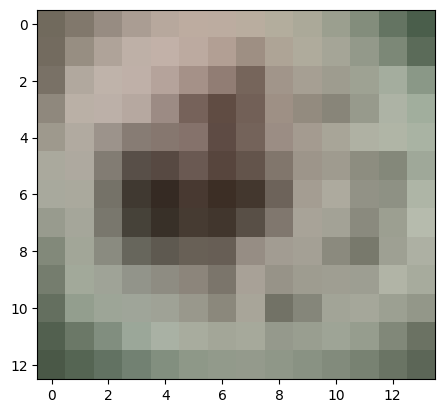

In [5]:
from matplotlib import pyplot as plt
banda1 = dataset.GetRasterBand(1).ReadAsArray()
banda2 = dataset.GetRasterBand(2).ReadAsArray()
banda3 = dataset.GetRasterBand(3).ReadAsArray()

bandaStack = np.stack((banda1,banda2,banda3), axis=-1)
plt.imshow(bandaStack)
plt.show()

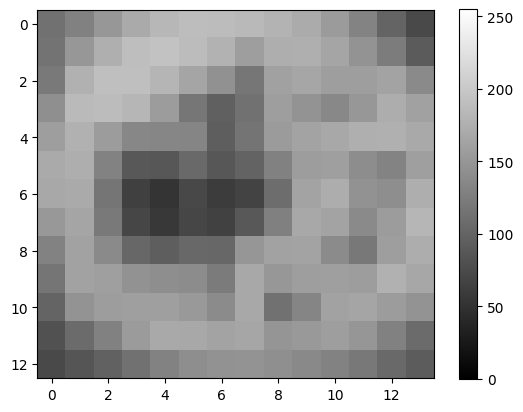

In [6]:
banda = dataset.GetRasterBand(1)
bandaArray = banda.ReadAsArray()
plt.imshow(bandaArray, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()